In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_spss('r32i_os.sav')
data

,idind,bbredid_i,bbid_i,bbid_h,aaid_i,aaid_h,zid_i,zid_h,yid_i,yid_h,...,bbl53,bbl54,bbm96,bbm97,bbm98,bbm99,bbm100,bbm101,bbm109,bbm111
0,7.0,66301.0,1.000301e+06,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92.0,68001.0,1.008401e+06,10084.0,1008401.0,10084.0,1008401.0,10084.0,1008401.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93.0,68002.0,1.008402e+06,10084.0,1008402.0,10084.0,1008402.0,10084.0,1008402.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95.0,68004.0,1.008404e+06,10084.0,1008404.0,10084.0,1008404.0,10084.0,1008404.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,68101.0,1.008601e+06,10086.0,1008601.0,10086.0,1008601.0,10086.0,1008601.0,10086.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,63954.0,660907.0,1.389002e+09,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11816,63955.0,663004.0,1.423019e+09,14230185.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11817,63956.0,665601.0,1.350669e+08,1350669.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11818,63957.0,666101.0,1.357046e+08,1357046.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dt1 = data[['bbj72.172', 'bbj13.2']]
dt1 = dt1[pd.to_numeric(dt1['bbj72.172'], errors='coerce').notnull()]
dt1 = dt1[pd.to_numeric(dt1['bbj13.2'], errors='coerce').notnull()]
dt1 = dt1[dt1['bbj13.2'].apply(lambda x: x!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ')]
dt1 = dt1[dt1['bbj13.2'].apply(lambda x: x not in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА','ОТКАЗ ОТ ОТВЕТА'] and float(x) < 300000.0)]
dt1

,bbj72.172,bbj13.2
2,3.0,35000.0
6,1.0,90000.0
7,3.0,25000.0
8,1.0,40000.0
12,1.0,50000.0
...,...,...
11787,2.0,30000.0
11797,2.0,150000.0
11809,1.0,30000.0
11814,2.0,40000.0


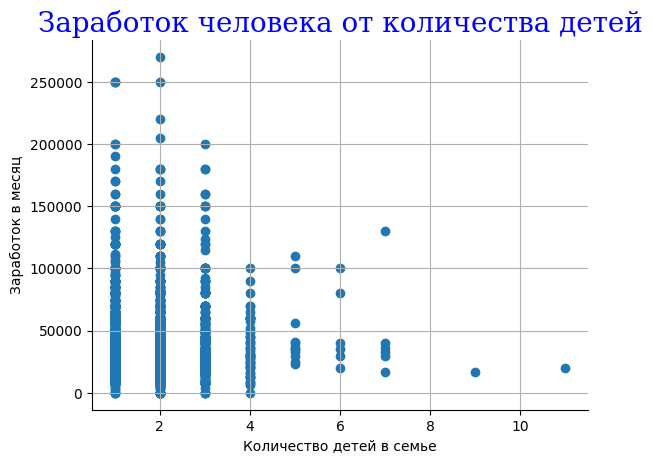

In [44]:
plt.scatter(dt1['bbj72.172'],dt1['bbj13.2'])
ax = plt.gca()  
plt.grid()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Заработок человека от количества детей",{'family':'serif','color':'blue','size':20})
plt.xlabel("Количество детей в семье")
plt.ylabel("Заработок в месяц")
plt.show()

In [57]:
d = {}

for childrean in range(1,9):
    l = list(dt1[dt1['bbj72.172'].apply(lambda x: x == childrean)]['bbj13.2'])
    if(l==[]):
        continue
    d[childrean] = sum(l)/len(l)
d

{1: 42015.7369165488,
 2: 39875.512856150104,
 3: 42931.57894736842,
 4: 37303.58490566038,
 5: 47083.333333333336,
 6: 50833.333333333336,
 7: 47666.666666666664}

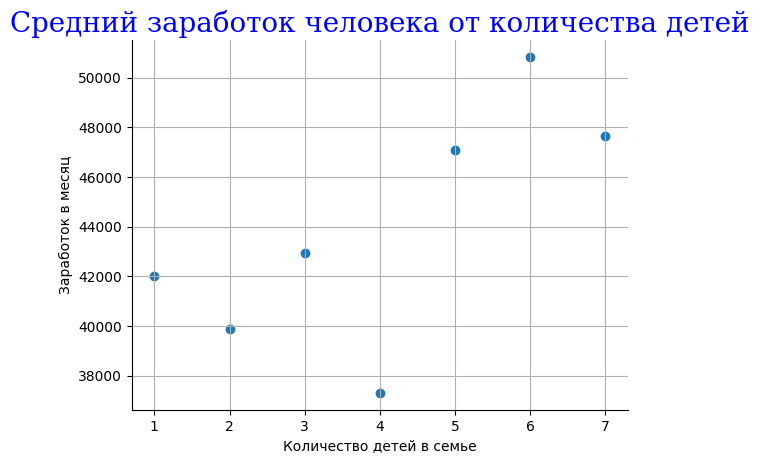

In [58]:
plt.scatter(d.keys(),d.values())
ax = plt.gca()  
plt.grid()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Средний заработок человека от количества детей",{'family':'serif','color':'blue','size':20})
plt.xlabel("Количество детей в семье")
plt.ylabel("Заработок в месяц")
plt.show()